In [1]:
import os
import pandas as pd
import seaborn as sns
os.chdir('C:\\Users\\HTCM\\Jupyter\\exp')

In [2]:
df = pd.read_excel('Individual_data.xlsx')
df

,Species_local,Tree_height,Tree_DBH,Crown_radi,Crown_surface_area,Light_exposure,Crown_class
0,Bohera,16.5,19.9,3.600,40.715136,3.50,Dominant
1,Kakra 1,7.1,13.1,2.500,19.635000,1.00,Suppress
2,Kakra 2,5.5,10.6,2.600,21.237216,1.00,Suppress
3,T-Jarul,11.0,27.8,3.000,28.274400,3.00,Co-dominant
4,Bhuti-awal,6.7,17.2,2.500,19.635000,2.00,Suppress
...,...,...,...,...,...,...,...
190,Bonak 6,13.5,48.5,8.315,217.207789,3.50,Dominant
191,Bonak 7,8.3,31.5,7.500,176.715000,1.50,Suppress
192,Bonak 8,11.6,32.1,5.125,82.516087,4.50,Co-dominant
193,Dumur,7.4,31.4,5.150,83.323086,1.75,Suppress


In [3]:
x = df.drop(['Crown_class','Species_local'], axis=1)

In [4]:
x

,Tree_height,Tree_DBH,Crown_radi,Crown_surface_area,Light_exposure
0,16.5,19.9,3.600,40.715136,3.50
1,7.1,13.1,2.500,19.635000,1.00
2,5.5,10.6,2.600,21.237216,1.00
3,11.0,27.8,3.000,28.274400,3.00
4,6.7,17.2,2.500,19.635000,2.00
...,...,...,...,...,...
190,13.5,48.5,8.315,217.207789,3.50
191,8.3,31.5,7.500,176.715000,1.50
192,11.6,32.1,5.125,82.516087,4.50
193,7.4,31.4,5.150,83.323086,1.75


In [5]:
y = df['Crown_class']

In [6]:
y.head()

0       Dominant
1       Suppress
2       Suppress
3    Co-dominant
4       Suppress
Name: Crown_class, dtype: object

In [7]:
x.head()

,Tree_height,Tree_DBH,Crown_radi,Crown_surface_area,Light_exposure
0,16.5,19.9,3.6,40.715136,3.5
1,7.1,13.1,2.5,19.635000,1.0
2,5.5,10.6,2.6,21.237216,1.0
3,11.0,27.8,3.0,28.274400,3.0
4,6.7,17.2,2.5,19.635000,2.0


In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30) #shift + tab button

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
tr = DecisionTreeClassifier()

In [11]:
tr.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [12]:
xtest.shape

(59, 5)

In [13]:
xtrain.shape

(136, 5)

In [14]:
pred = tr.predict(xtest)

In [15]:
pred

array(['Dominant', 'Co-dominant', 'Dominant', 'Suppress', 'Dominant',
       'Co-dominant', 'Co-dominant', 'Co-dominant', 'Co-dominant',
       'Dominant', 'Co-dominant', 'Dominant', 'Co-dominant',
       'Co-dominant', 'Co-dominant', 'Dominant', 'Co-dominant',
       'Dominant', 'Suppress', 'Dominant', 'Co-dominant', 'Suppress',
       'Dominant', 'Co-dominant', 'Suppress', 'Dominant', 'Dominant',
       'Co-dominant', 'Co-dominant', 'Dominant', 'Co-dominant',
       'Co-dominant', 'Co-dominant', 'Dominant', 'Suppress', 'Dominant',
       'Suppress', 'Co-dominant', 'Suppress', 'Dominant', 'Suppress',
       'Dominant', 'Dominant', 'Co-dominant', 'Suppress', 'Co-dominant',
       'Co-dominant', 'Suppress', 'Suppress', 'Dominant', 'Co-dominant',
       'Co-dominant', 'Suppress', 'Suppress', 'Co-dominant', 'Suppress',
       'Dominant', 'Suppress', 'Suppress'], dtype=object)

In [16]:
tr.score(xtest,ytest)

0.7457627118644068

In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [18]:
cm=confusion_matrix(ytest,pred)
cm

array([[17,  5,  2],
       [ 6, 13,  0],
       [ 1,  1, 14]], dtype=int64)

<AxesSubplot:>

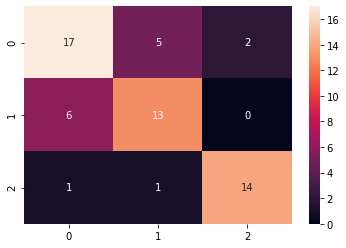

In [19]:
sns.heatmap(cm, annot=True)

In [20]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

 Co-dominant       0.71      0.71      0.71        24
    Dominant       0.68      0.68      0.68        19
    Suppress       0.88      0.88      0.88        16

    accuracy                           0.75        59
   macro avg       0.76      0.76      0.76        59
weighted avg       0.75      0.75      0.75        59



<AxesSubplot:>

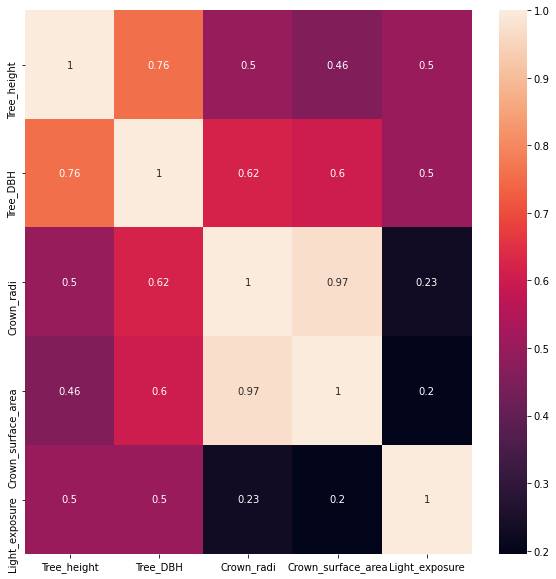

In [22]:
import matplotlib.pyplot as plt
features = x.columns
plt.figure(figsize=(10,10))
sns.heatmap(df[features].corr(),annot=True)

In [32]:
from sklearn import tree
plt.figure(figsize=(15,15),dpi=1000)
tree.plot_tree(tr,filled=True,feature_names=features)
plt.savefig('tree.png')